In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

Config Comparison

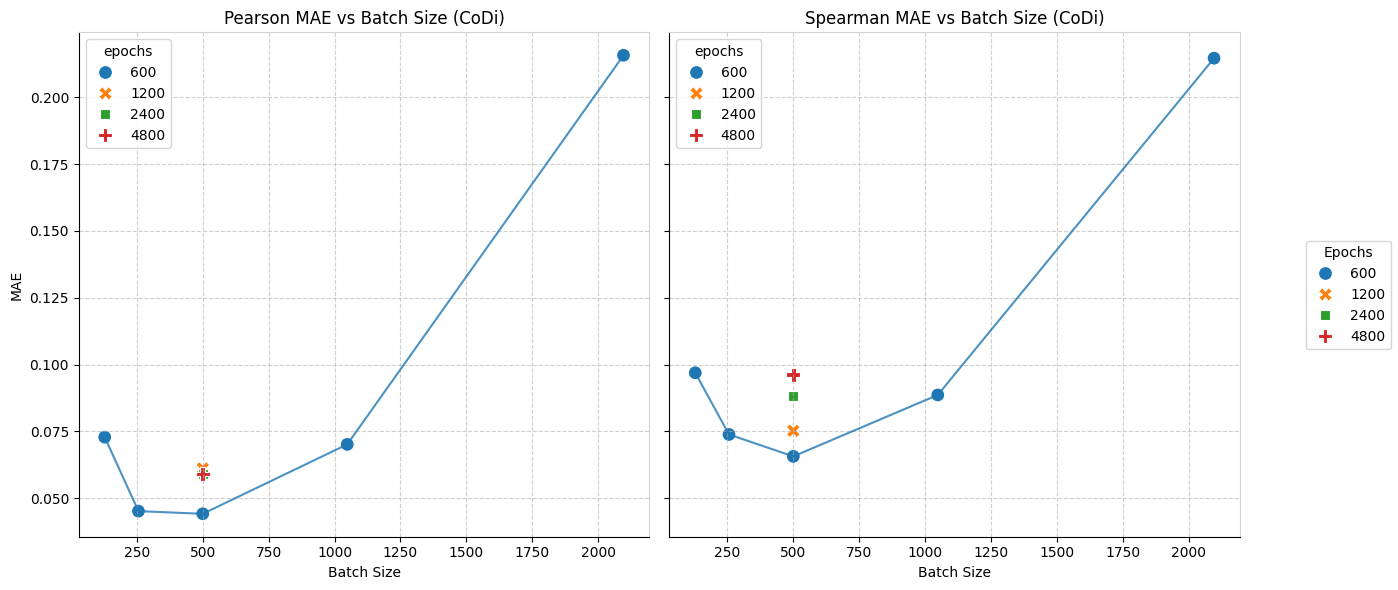

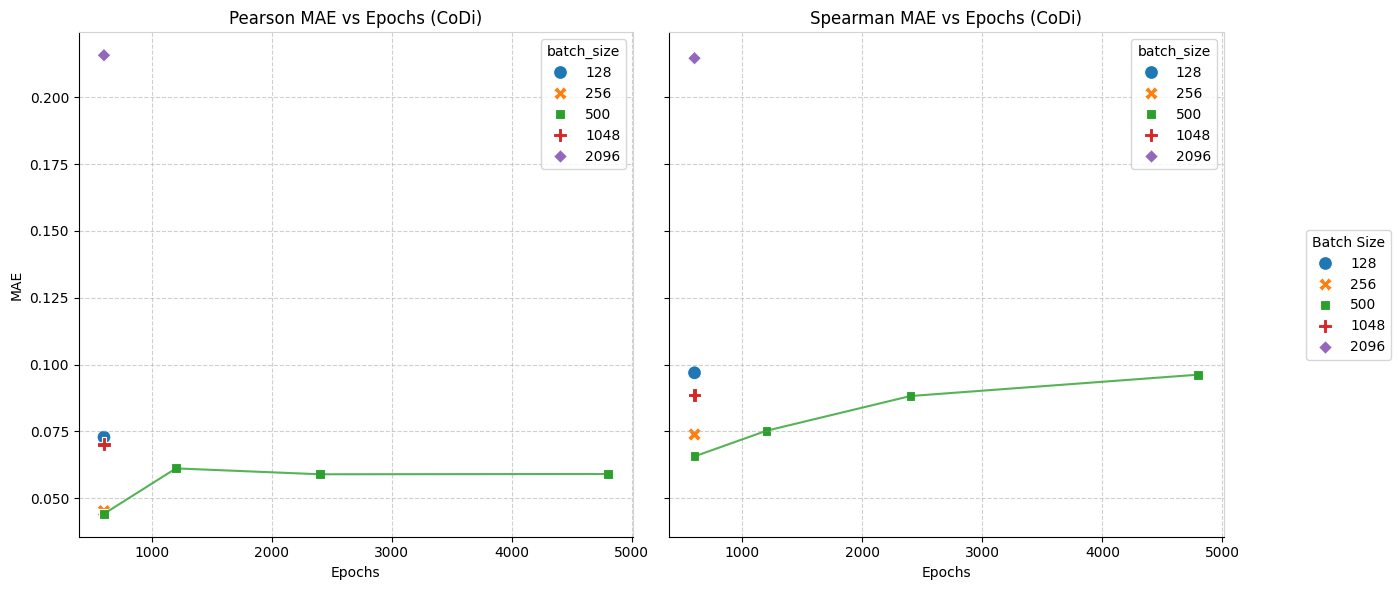

In [2]:
codi_log_df = pd.read_csv("Experiment_logs/experiment_log_codi.csv")

# Drop runs with 20000 epochs or 0.001 lr
codi_filtered = codi_log_df[~(codi_log_df["epochs"].isin([20000]) | codi_log_df["learning_rate"].isin([0.001]))]


# Keeping first run per (epochs, batch_size)
codi_best = codi_filtered.groupby(["epochs", "batch_size"], as_index=False).first()

# Chart 1: Batch size on x-axis, grouped by epochs
fig, axes = plt.subplots(1, 2, figsize=(14,6), sharey=True)

sns.scatterplot(
    data=codi_best,
    x="batch_size",
    y="pearson_mae",
    hue="epochs",
    style="epochs",
    s=100,
    palette="tab10",
    ax=axes[0]
)
sns.lineplot(
    data=codi_best,
    x="batch_size",
    y="pearson_mae",
    hue="epochs",
    legend=False,
    alpha=0.8,
    palette="tab10",
    ax=axes[0]
)
axes[0].set_title("Pearson MAE vs Batch Size (CoDi)")
axes[0].set_xlabel("Batch Size")
axes[0].set_ylabel("MAE")
axes[0].grid(True, linestyle="--", alpha=0.6)

sns.scatterplot(
    data=codi_best,
    x="batch_size",
    y="spearman_mae",
    hue="epochs",
    style="epochs",
    s=100,
    palette="tab10",
    ax=axes[1]
)
sns.lineplot(
    data=codi_best,
    x="batch_size",
    y="spearman_mae",
    hue="epochs",
    legend=False,
    alpha=0.8,
    palette="tab10",
    ax=axes[1]
)
axes[1].set_title("Spearman MAE vs Batch Size (CoDi)")
axes[1].set_xlabel("Batch Size")
axes[1].set_ylabel("")
axes[1].grid(True, linestyle="--", alpha=0.6)

handles, labels = axes[1].get_legend_handles_labels()
fig.legend(handles, labels, title="Epochs", loc="center right")

for ax in axes:
    for spine in ["top", "right"]:
        ax.spines[spine].set_color("lightgray")
        ax.spines[spine].set_linewidth(0.8)

plt.tight_layout(rect=[0,0,0.9,1])
plt.show()

# Chart 2: Epochs on x-axis, grouped by batch size 
fig, axes = plt.subplots(1, 2, figsize=(14,6), sharey=True)

sns.scatterplot(
    data=codi_best,
    x="epochs",
    y="pearson_mae",
    hue="batch_size",
    style="batch_size",
    s=100,
    palette="tab10",
    ax=axes[0]
)
sns.lineplot(
    data=codi_best,
    x="epochs",
    y="pearson_mae",
    hue="batch_size",
    legend=False,
    alpha=0.8,
    palette="tab10",
    ax=axes[0]
)
axes[0].set_title("Pearson MAE vs Epochs (CoDi)")
axes[0].set_xlabel("Epochs")
axes[0].set_ylabel("MAE")
axes[0].grid(True, linestyle="--", alpha=0.6)

sns.scatterplot(
    data=codi_best,
    x="epochs",
    y="spearman_mae",
    hue="batch_size",
    style="batch_size",
    s=100,
    palette="tab10",
    ax=axes[1]
)
sns.lineplot(
    data=codi_best,
    x="epochs",
    y="spearman_mae",
    hue="batch_size",
    legend=False,
    alpha=0.8,
    palette="tab10",
    ax=axes[1]
)
axes[1].set_title("Spearman MAE vs Epochs (CoDi)")
axes[1].set_xlabel("Epochs")
axes[1].set_ylabel("")
axes[1].grid(True, linestyle="--", alpha=0.6)

handles, labels = axes[1].get_legend_handles_labels()
fig.legend(handles, labels, title="Batch Size", loc="center right")

for ax in axes:
    for spine in ["top", "right"]:
        ax.spines[spine].set_color("lightgray")
        ax.spines[spine].set_linewidth(0.8)

plt.tight_layout(rect=[0,0,0.9,1])
plt.show()


In [3]:
import pandas as pd

codi_log = pd.read_csv("Experiment_logs/experiment_log_codi.csv")

# Selecting the last 3 rows (best configs)
best_configs = codi_log.tail(3)

# Compute median Pearson & Spearman MAE
median_mae = best_configs[["pearson_mae", "spearman_mae"]].median()

print("Median MAE of best configs:")
print(median_mae)


Median MAE of best configs:
pearson_mae     0.0441
spearman_mae    0.0656
dtype: float64


In [4]:
real_df = pd.read_csv("Data/Real_Datasets/wine_processed_dedu.csv")
codi_df = pd.read_csv('Data/Synthetic_Datasets/Codi/codi_run_codi_exp_2_0.csv')

In [5]:
print('CoDi Dataset')
display(codi_df.head())

CoDi Dataset


,0,1,2,3,4,5,6,7,8,9,10,11,12
0,-0.408720,-0.487855,0.654295,0.699254,0.434491,-1.127649,0.176230,-0.298777,0.864943,0.517976,1.147006,1.487880,1.0
1,2.527335,0.555722,-0.051802,-0.384008,1.361011,-0.219167,-0.748888,1.037294,-0.342321,0.147084,-0.758748,-0.147239,0.0
2,0.782933,1.695580,-2.058186,-0.349746,0.953681,-0.126232,-0.850371,0.848158,0.145194,0.236235,-0.817893,-1.979659,0.0
3,2.131933,3.047284,-1.355760,1.190691,0.689689,-0.564162,-0.763691,2.031520,1.924832,0.169734,-0.138152,-0.056265,0.0
4,0.118043,-1.078210,0.628448,-0.220445,-0.531371,0.647980,0.435292,-0.097171,1.482130,-0.909989,0.850398,1.181933,1.0


In [7]:
print(codi_df.head())

          0         1         2         3         4         5         6  \
0 -0.408720 -0.487855  0.654295  0.699254  0.434491 -1.127649  0.176230   
1  2.527335  0.555722 -0.051802 -0.384008  1.361011 -0.219167 -0.748888   
2  0.782933  1.695580 -2.058186 -0.349746  0.953681 -0.126232 -0.850371   
3  2.131933  3.047284 -1.355760  1.190691  0.689689 -0.564162 -0.763691   
4  0.118043 -1.078210  0.628448 -0.220445 -0.531371  0.647980  0.435292   

          7         8         9        10        11   12  
0 -0.298777  0.864943  0.517976  1.147006  1.487880  1.0  
1  1.037294 -0.342321  0.147084 -0.758748 -0.147239  0.0  
2  0.848158  0.145194  0.236235 -0.817893 -1.979659  0.0  
3  2.031520  1.924832  0.169734 -0.138152 -0.056265  0.0  
4 -0.097171  1.482130 -0.909989  0.850398  1.181933  1.0  


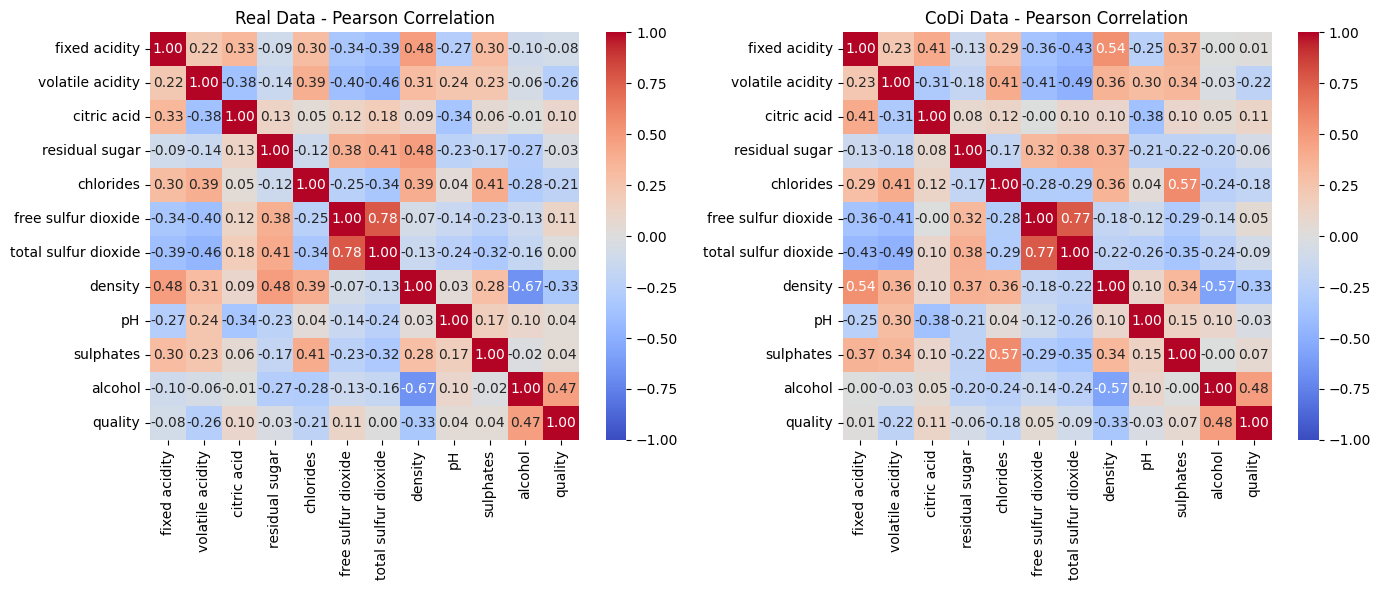

In [8]:
# --- Prepare Data ---
# Drop 'type' from real
real_num = real_df.drop(columns=['type'], errors='ignore')

# Drop last column from CoDi (extra 0/1 column)
codi_num = codi_df.drop(columns=[codi_df.columns[-1]], errors='ignore')

# Align column names
codi_num.columns = real_num.columns

# Correlations
real_pearson = real_num.corr(method='pearson')
codi_pearson = codi_num.corr(method='pearson')
diff_pearson = real_pearson - codi_pearson


# --- Figure 1: Real vs CoDi ---
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.heatmap(real_pearson, annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Real Data - Pearson Correlation")

plt.subplot(1, 2, 2)
sns.heatmap(codi_pearson, annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1)
plt.title("CoDi Data - Pearson Correlation")

plt.tight_layout()
plt.show()




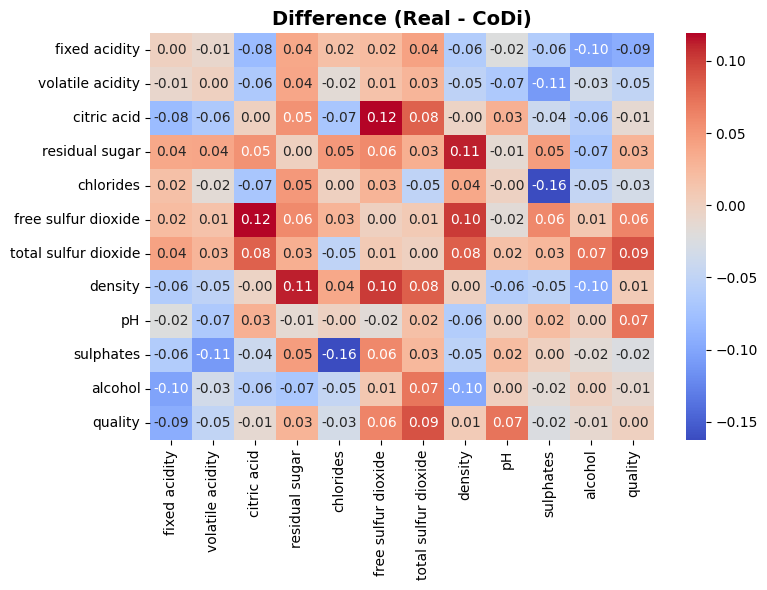

In [9]:
# --- Figure 2: Difference only (more colorful) ---
plt.figure(figsize=(8, 6))
sns.heatmap(
    diff_pearson,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",          # stronger red/blue diverging palette
    
)
plt.title("Difference (Real - CoDi)", fontsize=14, weight="bold")
plt.tight_layout()
plt.show()


In [10]:
# Top 3 Pearson shifts 
# Align columns between real and fake correlations
common_cols = real_pearson.columns.intersection(codi_pearson.columns)
real_pearson = real_pearson.loc[common_cols, common_cols]
codi_pearson = codi_pearson.loc[common_cols, common_cols]

# Compute difference and absolute difference
diff_codi = real_pearson - codi_pearson
abs_diff = diff_codi.abs()

# Mean absolute difference (off-diagonal)
vals = abs_diff.values[np.triu_indices_from(abs_diff, k=1)]
print("Mean absolute Pearson diff (CoDi):", round(vals.mean(), 3))

# Collect correlation differences with actual values
records = []
for i, j in zip(*np.triu_indices_from(abs_diff, k=1)):
    records.append({
        "Metric": "Pearson",
        "Pair": f"{diff_codi.columns[i]} – {diff_codi.columns[j]}",
        "Real": real_pearson.iloc[i, j],
        "Fake": codi_pearson.iloc[i, j],
        "Abs Δ": abs_diff.iloc[i, j]
    })

# Sort by largest drift
codi_pearson_top3 = sorted(records, key=lambda x: x["Abs Δ"], reverse=True)[:3]

# --- print standalone table ---
col_width = 25
header = f"{'Pair':<{col_width}} | {'Real':>7} | {'Fake':>7} | {'Abs Δ':>6}"
print("\nTop 3 biggest Pearson shifts (CoDi):\n")
print("-" * len(header))
print(header)
print("-" * len(header))
for r in codi_pearson_top3:
    print(f"{r['Pair']:<{col_width}} | "
          f"{r['Real']:>7.2f} | "
          f"{r['Fake']:>7.2f} | "
          f"{r['Abs Δ']:>6.2f}")
print("-" * len(header))


Mean absolute Pearson diff (CoDi): 0.048

Top 3 biggest Pearson shifts (CoDi):

------------------------------------------------------
Pair                      |    Real |    Fake |  Abs Δ
------------------------------------------------------
chlorides – sulphates     |    0.41 |    0.57 |   0.16
citric acid – free sulfur dioxide |    0.12 |   -0.00 |   0.12
residual sugar – density  |    0.48 |    0.37 |   0.11
------------------------------------------------------


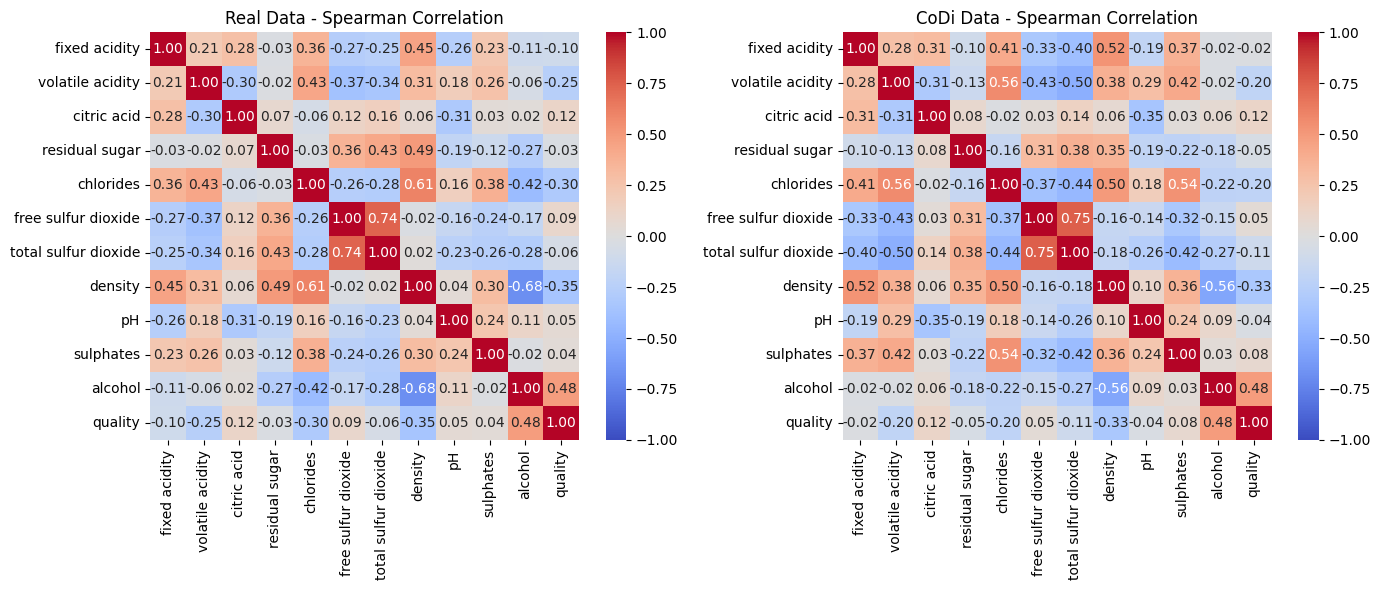

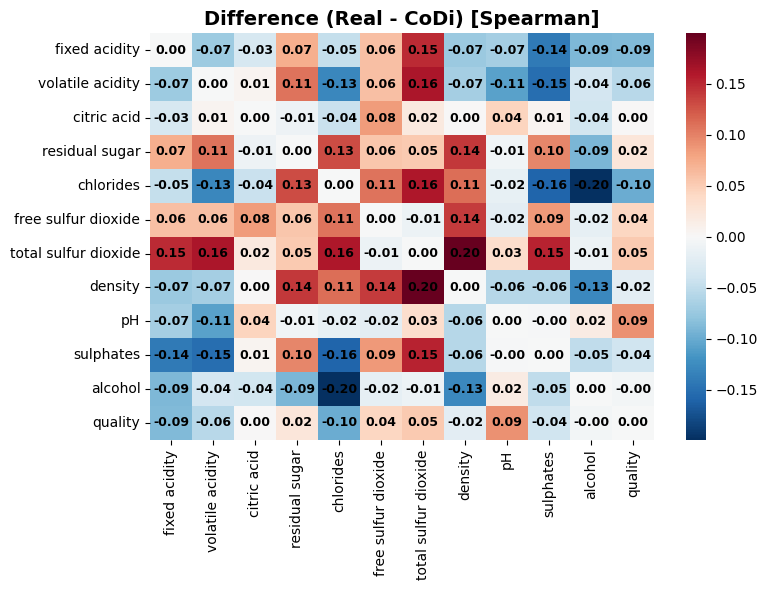

In [11]:
#  Preparing Data
# Drop 'type' from real
real_num = real_df.drop(columns=['type'], errors='ignore')

# Drop last column from CoDi (extra 0/1 column)
codi_num = codi_df.drop(columns=[codi_df.columns[-1]], errors='ignore')

# Align column names
codi_num.columns = real_num.columns

# Spearman correlations
real_spearman = real_num.corr(method='spearman')
codi_spearman = codi_num.corr(method='spearman')
diff_spearman = real_spearman - codi_spearman


# --- Figure 1: Real vs CoDi ---
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.heatmap(real_spearman, annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Real Data - Spearman Correlation")

plt.subplot(1, 2, 2)
sns.heatmap(codi_spearman, annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1)
plt.title("CoDi Data - Spearman Correlation")

plt.tight_layout()
plt.show()


# --- Figure 2: Difference only ---
plt.figure(figsize=(8, 6))
ax = sns.heatmap(
    diff_spearman,
    cmap="RdBu_r"
    
)

# Dynamic annotation text for readability
for i in range(diff_spearman.shape[0]):
    for j in range(diff_spearman.shape[1]):
        value = diff_spearman.iloc[i, j]
        color = "white" if abs(value) > 0.25 else "black"
        ax.text(j + 0.5, i + 0.5, f"{value:.2f}",
                ha="center", va="center", color=color, fontsize=9, weight="bold")

plt.title("Difference (Real - CoDi) [Spearman]", fontsize=14, weight="bold")
plt.tight_layout()
plt.show()



In [12]:
# CoDi: Top 3 Spearman shifts 
abs_diff_s = diff_spearman.abs()

# Mean absolute difference (off-diagonal only)
vals_s = abs_diff_s.values[np.triu_indices_from(abs_diff_s, k=1)]
print("Mean absolute Spearman diff (CoDi):", round(vals_s.mean(), 3))

# Collect differences with actual values
records_s = []
for i, j in zip(*np.triu_indices_from(abs_diff_s, k=1)):
    records_s.append({
        "Metric": "Spearman",
        "Pair": f"{diff_spearman.columns[i]} – {diff_spearman.columns[j]}",
        "Real": real_spearman.iloc[i, j],
        "Fake": codi_spearman.iloc[i, j],
        "Abs Δ": abs_diff_s.iloc[i, j]
    })

# Sort by largest drift (top 3)
codi_spearman_top3 = sorted(records_s, key=lambda x: x["Abs Δ"], reverse=True)[:3]

#  print standalone table
col_width = 25
header = f"{'Pair':<{col_width}} | {'Real':>7} | {'Fake':>7} | {'Abs Δ':>6}"
print("\nTop 3 biggest Spearman shifts (CoDi):\n")
print("-" * len(header))
print(header)
print("-" * len(header))
for r in codi_spearman_top3:
    print(f"{r['Pair']:<{col_width}} | "
          f"{r['Real']:>7.2f} | "
          f"{r['Fake']:>7.2f} | "
          f"{r['Abs Δ']:>6.2f}")
print("-" * len(header))


Mean absolute Spearman diff (CoDi): 0.072

Top 3 biggest Spearman shifts (CoDi):

------------------------------------------------------
Pair                      |    Real |    Fake |  Abs Δ
------------------------------------------------------
total sulfur dioxide – density |    0.02 |   -0.18 |   0.20
chlorides – alcohol       |   -0.42 |   -0.22 |   0.20
volatile acidity – total sulfur dioxide |   -0.34 |   -0.50 |   0.16
------------------------------------------------------


Distance correlation

In [13]:
import numpy as np

# 1- fast distance covariance
def fast_dcov(x, y):
    x = np.asarray(x).flatten()
    y = np.asarray(y).flatten()
    n = len(x)
    
    # Sort x
    idx = np.argsort(x)
    x = x[idx]
    y = y[idx]
    
    # Row sums of distance matrix of x
    si = np.cumsum(x)
    s = si[-1]
    ax = (-(n-2) + 2*np.arange(n)) * x + (s - 2*si)
    
    # Weight matrix
    v = np.column_stack((x, y, x*y))
    nw = v.shape[1]
    
    idx_buf = np.zeros((n, 2), dtype=int)
    idx_buf[:, 0] = np.arange(n)
    
    iv1 = np.zeros(n)
    iv2 = np.zeros(n)
    iv3 = np.zeros(n)
    iv4 = np.zeros(n)
    
    i = 1
    r, s_idx = 0, 1
    while i < n:
        gap = 2 * i
        k = 0
        idxr = idx_buf[:, r]
        csumv = np.vstack([np.zeros((1, nw)), np.cumsum(v[idxr], axis=0)])
        
        for j in range(0, n, gap):
            st1 = j
            e1 = min(st1 + i - 1, n-1)
            st2 = j + i
            e2 = min(st2 + i - 1, n-1)
            
            while st1 <= e1 and st2 <= e2:
                idx1 = idxr[st1]
                idx2 = idxr[st2]
                if y[idx1] >= y[idx2]:
                    idx_buf[k, s_idx] = idx1
                    st1 += 1
                else:
                    idx_buf[k, s_idx] = idx2
                    iv1[idx2] += e1 - st1 + 1
                    iv2[idx2] += csumv[e1+1, 0] - csumv[st1, 0]
                    iv3[idx2] += csumv[e1+1, 1] - csumv[st1, 1]
                    iv4[idx2] += csumv[e1+1, 2] - csumv[st1, 2]
                    st2 += 1
                k += 1
            
            # Copy leftovers
            if st1 <= e1:
                idx_buf[k:k+e1-st1+1, s_idx] = idxr[st1:e1+1]
                k += e1-st1+1
            elif st2 <= e2:
                idx_buf[k:k+e2-st2+1, s_idx] = idxr[st2:e2+1]
                k += e2-st2+1
                
        i = gap
        r, s_idx = s_idx, r
    
    covterm = n * np.sum((x - np.mean(x)) * (y - np.mean(y)))
    c1 = np.dot(iv1, v[:, 2])
    c2 = np.sum(iv4)
    c3 = np.dot(iv2, y)
    c4 = np.dot(iv3, x)
    d = 4 * ((c1 + c2) - (c3 + c4)) - 2 * covterm
    
    ySorted = y[idx_buf[n-1::-1, r]]
    si_y = np.cumsum(ySorted)
    s_y = si_y[-1]
    by = np.zeros(n)
    by[idx_buf[n-1::-1, r]] = (-(n-2) + 2*np.arange(n)) * ySorted + (s_y - 2*si_y)
    
    nsq = n * n
    ncb = nsq * n
    nq = ncb * n
    term1 = d / nsq
    term2 = 2 * np.dot(ax, by) / ncb
    term3 = np.sum(ax) * np.sum(by) / nq
    
    covsq = (term1 + term3) - term2
    return covsq

#2 - distance correlation matrix for tabular data
def distance_correlation_matrix(data):
    data = np.asarray(data)
    n_features = data.shape[1]
    dcor_mat = np.zeros((n_features, n_features))

    for i in range(n_features):
        for j in range(i, n_features):
            x = data[:, i]
            y = data[:, j]
            dcov_xy = fast_dcov(x, y)
            dcov_xx = fast_dcov(x, x)
            dcov_yy = fast_dcov(y, y)
            dcor = np.sqrt(dcov_xy / np.sqrt(dcov_xx * dcov_yy)) if dcov_xx > 0 and dcov_yy > 0 else 0
            dcor_mat[i, j] = dcor
            dcor_mat[j, i] = dcor

    return dcor_mat


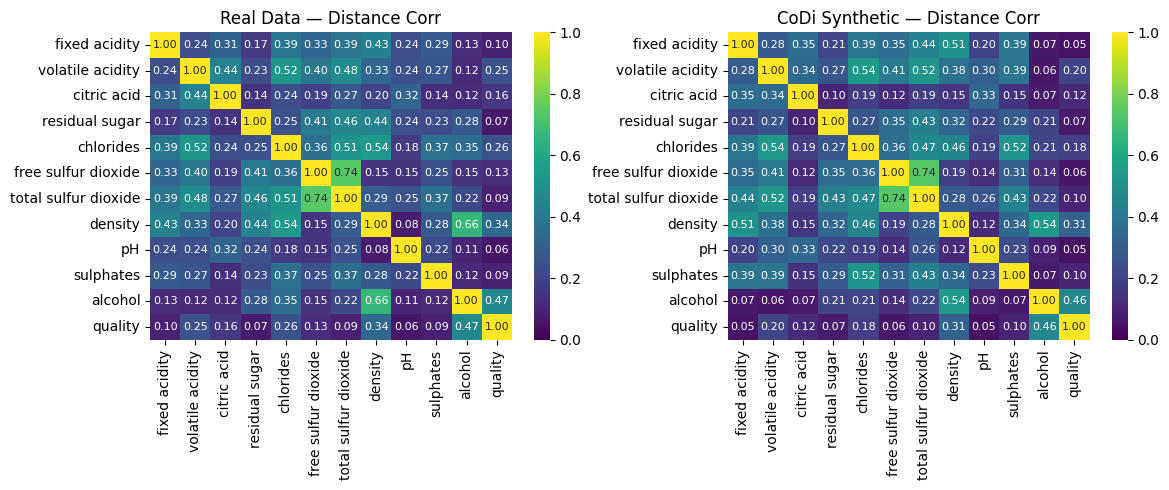

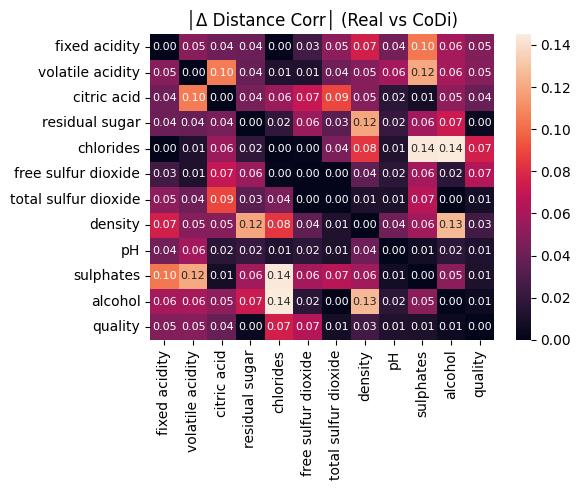

In [14]:
# Compute distance correlation matrices for real and CoDi 
real_dcor = distance_correlation_matrix(real_num.values)
fake_dcor = distance_correlation_matrix(codi_num.values)

real_dcor = pd.DataFrame(real_dcor, index=real_num.columns, columns=real_num.columns)
fake_dcor = pd.DataFrame(fake_dcor, index=codi_num.columns, columns=codi_num.columns)

# Plot side by side 
fig, axes = plt.subplots(1, 2, figsize=(12,5), tight_layout=True)

sns.heatmap(real_dcor, vmin=0, vmax=1, cmap="viridis", annot=True, fmt=".2f",
            annot_kws={"size":8}, ax=axes[0])
axes[0].set_title("Real Data — Distance Corr")

sns.heatmap(fake_dcor, vmin=0, vmax=1, cmap="viridis", annot=True, fmt=".2f",
            annot_kws={"size":8}, ax=axes[1])
axes[1].set_title("CoDi Synthetic — Distance Corr")

plt.show()

# Difference heatmap 
diff_dcor = (real_dcor - fake_dcor).abs().round(3)
plt.figure(figsize=(6,5))
sns.heatmap(diff_dcor, vmin=0, vmax=diff_dcor.values.max(), cmap="rocket",
            annot=True, fmt=".2f", annot_kws={"size":8})
plt.title("│Δ Distance Corr│ (Real vs CoDi)")
plt.tight_layout()
plt.show()



In [15]:
# CoDi: Top 3 Distance Corr shifts 
i, j = np.triu_indices_from(diff_dcor, k=1)
records_d = [
    {
        "Metric": "Distance Corr",
        "Pair": f"{diff_dcor.columns[i_]} – {diff_dcor.columns[j_]}",
        "Real": real_dcor.values[i_, j_],
        "Fake": fake_dcor.values[i_, j_],
        "Abs Δ": diff_dcor.values[i_, j_]
    }
    for i_, j_ in zip(i, j)
]

# Sort and take top 3
codi_dcor_top3 = sorted(records_d, key=lambda x: x["Abs Δ"], reverse=True)[:3]

# --- Pretty print standalone table ---
col_width = 25
header = f"{'Pair':<{col_width}} | {'Real':>7} | {'Fake':>7} | {'Abs Δ':>6}"
print("\nTop 3 biggest Distance Corr shifts (CoDi):\n")
print("-" * len(header))
print(header)
print("-" * len(header))
for r in codi_dcor_top3:
    print(f"{r['Pair']:<{col_width}} | "
          f"{r['Real']:>7.2f} | "
          f"{r['Fake']:>7.2f} | "
          f"{r['Abs Δ']:>6.2f}")
print("-" * len(header))



Top 3 biggest Distance Corr shifts (CoDi):

------------------------------------------------------
Pair                      |    Real |    Fake |  Abs Δ
------------------------------------------------------
chlorides – alcohol       |    0.35 |    0.21 |   0.14
chlorides – sulphates     |    0.37 |    0.52 |   0.14
density – alcohol         |    0.66 |    0.54 |   0.13
------------------------------------------------------


In [16]:
# MAE for distance correlation 
vals = diff_dcor.values[np.triu_indices_from(diff_dcor, k=1)]
mae_dcor = vals.mean()
print("Mean absolute Distance Corr diff (MAE):", round(mae_dcor, 3))


Mean absolute Distance Corr diff (MAE): 0.046


In [17]:
from tabulate import tabulate
import pandas as pd

def pretty_print_tool_table(tool_name, top3_dict):
    rows = []
    for metric, records in top3_dict.items():
        df = pd.DataFrame(records)[["Pair", "Real", "Fake", "Abs Δ"]]

        for idx, row in df.iterrows():
            rows.append([
                tool_name if idx == 0 and metric == list(top3_dict.keys())[0] else "",
                metric if idx == 0 else "",
                row["Pair"],
                f"{row['Real']:.3f}",
                f"{row['Fake']:.3f}",
                f"{row['Abs Δ']:.3f}"
            ])
        # add separator line
        rows.append(["", "──────────", "────────────────────", "─────", "─────", "─────"])

    headers = ["Tool", "Metric", "Pair", "Real", "Fake", "Abs Δ"]
    print(tabulate(rows, headers=headers, tablefmt="pretty"))

# Combine all three for CoDi 
codi_top3_dict = {
    "Pearson": codi_pearson_top3,
    "Spearman": codi_spearman_top3,
    "Distance Corr": codi_dcor_top3
}

# Print grouped table for CoDi
pretty_print_tool_table("CoDi", codi_top3_dict)


+------+---------------+-----------------------------------------+--------+--------+-------+
| Tool |    Metric     |                  Pair                   |  Real  |  Fake  | Abs Δ |
+------+---------------+-----------------------------------------+--------+--------+-------+
| CoDi |    Pearson    |          chlorides – sulphates          | 0.406  | 0.569  | 0.163 |
|      |               |    citric acid – free sulfur dioxide    | 0.119  | -0.001 | 0.119 |
|      |               |        residual sugar – density         | 0.482  | 0.370  | 0.112 |
|      |  ──────────   |          ────────────────────           | ─────  | ─────  | ───── |
|      |   Spearman    |     total sulfur dioxide – density      | 0.022  | -0.178 | 0.199 |
|      |               |           chlorides – alcohol           | -0.417 | -0.218 | 0.199 |
|      |               | volatile acidity – total sulfur dioxide | -0.341 | -0.504 | 0.163 |
|      |  ──────────   |          ────────────────────           | ───

In [18]:
codi_num.to_csv("Data/Synthetic_Datasets/CoDi/codi_aligned.csv", index=False)

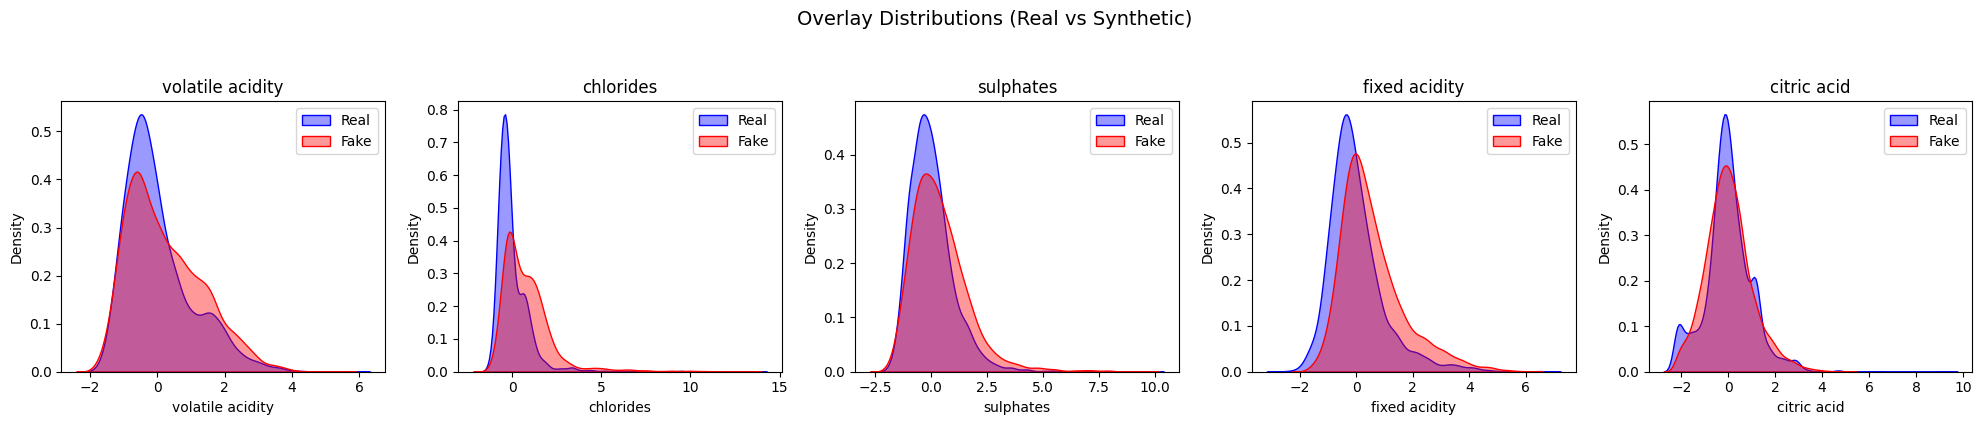

In [19]:
features = ["volatile acidity", "chlorides", "sulphates", "fixed acidity", "citric acid"]

fig, axes = plt.subplots(1, len(features), figsize=(4*len(features), 4), tight_layout=True)

for idx, feat in enumerate(features):
    sns.kdeplot(real_num[feat], fill=True, color="blue", label="Real", ax=axes[idx], alpha=0.4)
    sns.kdeplot(codi_num[feat], fill=True, color="red", label="Fake", ax=axes[idx], alpha=0.4)
    axes[idx].set_title(feat)
    axes[idx].legend()

plt.suptitle("Overlay Distributions (Real vs Synthetic)", fontsize=14, y=1.05)
plt.show()


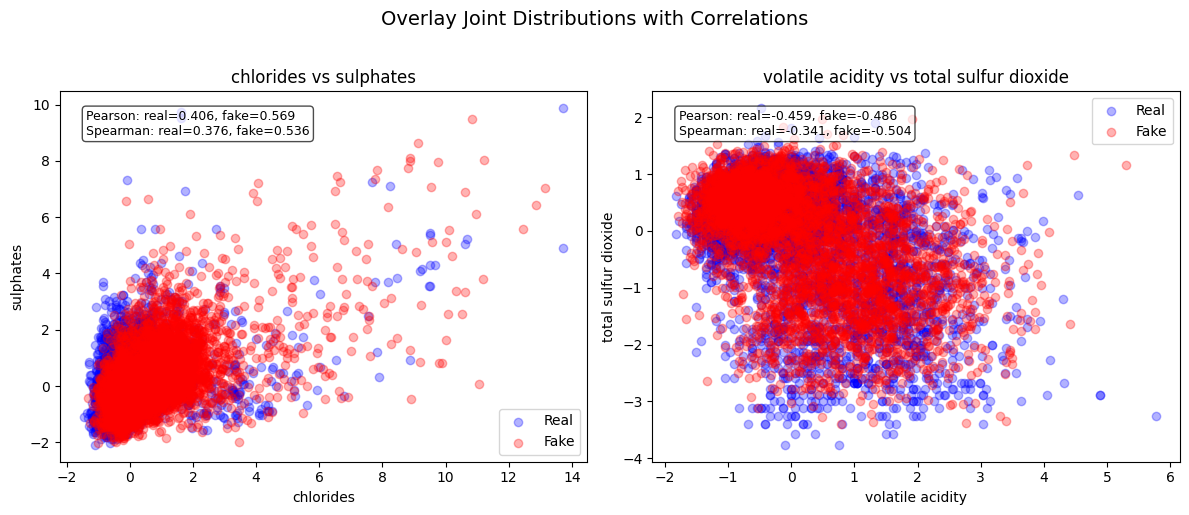

In [20]:
from scipy.stats import spearmanr

pairs = [
    ("chlorides", "sulphates"),
    ("volatile acidity", "total sulfur dioxide")
]

fig, axes = plt.subplots(1, len(pairs), figsize=(6*len(pairs), 5), tight_layout=True)

for idx, (f1, f2) in enumerate(pairs):
    # --- Scatter overlay ---
    axes[idx].scatter(real_num[f1], real_num[f2], alpha=0.3, color="blue", label="Real")
    axes[idx].scatter(codi_num[f1], codi_num[f2], alpha=0.3, color="red", label="Fake")

    axes[idx].set_title(f"{f1} vs {f2}")
    axes[idx].set_xlabel(f1)
    axes[idx].set_ylabel(f2)

    # --- Compute correlations ---
    pear_real = real_num[[f1, f2]].corr(method="pearson").iloc[0,1]
    pear_fake = codi_num[[f1, f2]].corr(method="pearson").iloc[0,1]
    spear_real, _ = spearmanr(real_num[f1], real_num[f2])
    spear_fake, _ = spearmanr(codi_num[f1], codi_num[f2])

    # --- Annotate on plot ---
    textstr = (f"Pearson: real={pear_real:.3f}, fake={pear_fake:.3f}\n"
               f"Spearman: real={spear_real:.3f}, fake={spear_fake:.3f}")
    axes[idx].text(0.05, 0.95, textstr, transform=axes[idx].transAxes,
                   fontsize=9, va="top", ha="left",
                   bbox=dict(boxstyle="round", facecolor="white", alpha=0.7))

    axes[idx].legend()

plt.suptitle("Overlay Joint Distributions with Correlations", fontsize=14, y=1.02)
plt.show()
